In [134]:
import pandas as pd 
import numpy as np

In [135]:
file_path = "C:/Users/skesh/"
fine_name = "Online Retail.xlsx"

df=pd.read_excel(file_path+fine_name)

In [136]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [137]:
#investigating the Null Customers Id 
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [138]:
#Sorting by quantity 
df[df['CustomerID'].isnull()].sort_values(by='Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.0,NaN,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.0,NaN,United Kingdom
225528,556687,23003,Printing smudges/thrown away,-9058,2011-06-14 10:36:00,0.0,NaN,United Kingdom
115818,546152,72140F,throw away,-5368,2011-03-09 17:25:00,0.0,NaN,United Kingdom
431381,573596,79323W,"Unsaleable, destroyed.",-4830,2011-10-31 15:17:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
74615,542505,79063D,NaN,2560,2011-01-28 12:04:00,0.0,NaN,United Kingdom
115807,546139,84988,?,3000,2011-03-09 16:35:00,0.0,NaN,United Kingdom
263885,560040,23343,came coded as 20713,3100,2011-07-14 14:28:00,0.0,NaN,United Kingdom
220843,556231,85123A,?,4000,2011-06-09 15:04:00,0.0,NaN,United Kingdom


As the sorting result displays -ve values in quantity which indicates that this might be return orders

Not necessary that return can only be applicable where CustomerId is null so now we have two aspect to check -ve value where id is null as well as where it is not null.

#### Lets find out the return orders where the customer_id is null 

In [139]:
null_customers_df = df[df['CustomerID'].isnull()]

null_id_orders = null_customers_df[null_customers_df["Quantity"]<0].InvoiceNo.nunique()

print("Total return orders where the customer_id is null = ",null_id_orders)

Total return orders where the customer_id is null =  1518


#### Lets find out the total return orders

In [140]:
total_return=df[df['Quantity']<0].InvoiceNo.nunique()

print("Total number of Return Orders = ",total_return)

Total number of Return Orders =  5172


#### Let's see the order count country wise 

In [141]:
import matplotlib.pyplot as plt

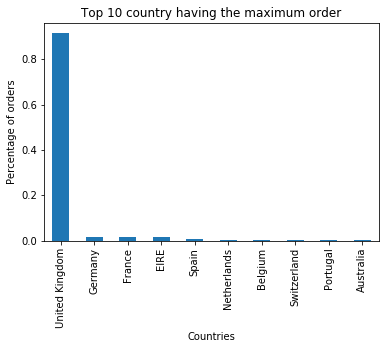

In [142]:
df['Country'].value_counts(normalize=True).head(10).plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Percentage of orders')
plt.title('Top 10 country having the maximum order')
plt.show()

From this we can conclude that more than 90% orders are from UK 

In [143]:
#Restricting the Data only for UK
df= df[df['Country']=='United Kingdom']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [144]:
#Restricting the Data where quantity > 0
df=df[df['Quantity']>0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [145]:
#Convert the date into DateTime object. Print the max and min date.
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [146]:
df['Month']=df['InvoiceDate'].dt.month
df

C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,12
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,12
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,12
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,12


In [147]:
df['Year']=df['InvoiceDate'].dt.year
df

C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,12,2011
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,12,2011
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,12,2011
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,12,2011


In [148]:
#converting from integers to strings
df['Month'] = df['Month'].astype('str')
df['Year'] = df['Year'].astype('str')
df['Month-Year_wise']=df['Month']+"-"+df['Year']
df

C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Month-Year_wise
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,12-2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,12-2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,12-2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,12-2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,12-2010
...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,12,2011,12-2011
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,12,2011,12-2011
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,12,2011,12-2011
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,12,2011,12-2011


Drop record where CustomerID is null

Drop record where Unitprice is less than 0

Create a revenue field (Revenue = Quantity * Unit Price)

In [149]:
df=df[df['CustomerID'].notnull()]

In [150]:
df['Revenue']=df['Quantity']*df['UnitPrice']

C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Aggregating the Orders by Month

In [151]:
print("The minimum date is : ",df['InvoiceDate'].min().date())
print("The minimum date is : ",df['InvoiceDate'].max().date())

The minimum date is :  2010-12-01
The minimum date is :  2011-12-09


So we have around 1 year of data 

In [152]:
df['Month'] = df['Month'].astype('int')
df['Year'] = df['Year'].astype('int')

C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [153]:
df_month_agg = df.groupby('Month-Year_wise',
                          as_index=False).agg({'InvoiceNo': 'nunique',
                                              'Revenue':'sum',
                                              'Year':'first',
                                             'Month':'first'}).rename(columns={'InvoiceNo':'No. of Orders'})

df_month_agg = df_month_agg.sort_values(by=['Year','Month'])

#### Create Month wise Quatity plot (line plot)


In [154]:
df_month_agg[['Month-Year_wise','No. of Orders']]

,Month-Year_wise,No. of Orders
3,12-2010,1291
0,1-2011,874
5,2-2011,897
6,3-2011,1177
7,4-2011,1058
8,5-2011,1403
9,6-2011,1249
10,7-2011,1200
11,8-2011,1133
12,9-2011,1569


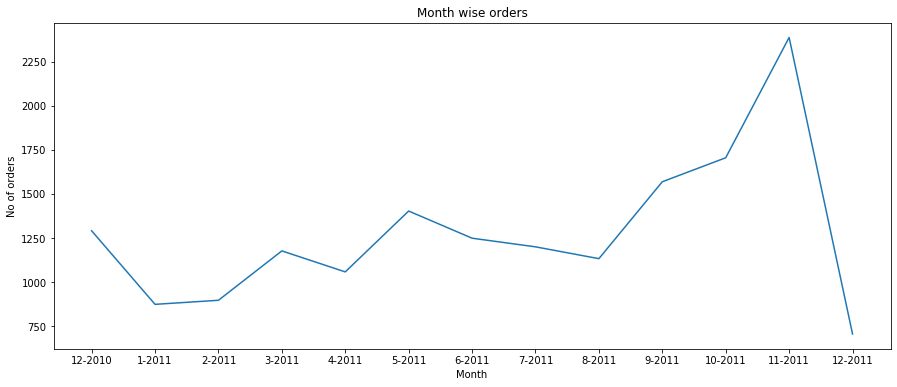

In [155]:
plt.figure(figsize=(15,6))
plt.plot(df_month_agg['Month-Year_wise'],df_month_agg['No. of Orders'])
plt.xlabel('Month')
plt.ylabel('No of orders')
plt.title('Month wise orders')
plt.savefig("Monthwise Order Summary.png")
plt.show()

#### Create Month wise Revenue plot (line plot)


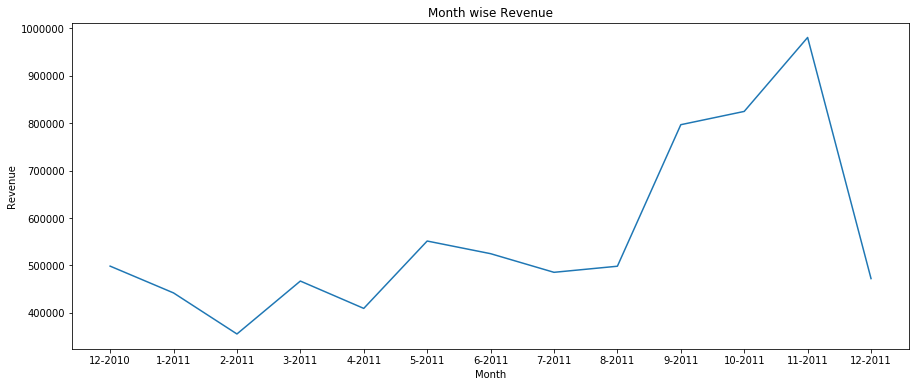

In [156]:
plt.figure(figsize=(15,6))
plt.plot(df_month_agg['Month-Year_wise'],df_month_agg['Revenue'])
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Month wise Revenue')
plt.savefig("Monthwise Revenue.png")
plt.show()

### Recency

In [157]:
last_date=pd.datetime(2011,12,9)

C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [158]:
df_recency = df.groupby('CustomerID',as_index=False).agg({'InvoiceDate':'max'})

#aaj ke din se customer ne kitne din pehle order kara tha 
df_recency['Recency']=(last_date-df_recency['InvoiceDate']).dt.days  
df_recency

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:01:00,324
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,-1
3,12749.0,2011-12-06 09:56:00,2
4,12820.0,2011-12-06 15:12:00,2
...,...,...,...
3916,18280.0,2011-03-07 09:52:00,276
3917,18281.0,2011-06-12 10:53:00,179
3918,18282.0,2011-12-02 11:43:00,6
3919,18283.0,2011-12-06 12:02:00,2


In [159]:
df_recency['Recency'].replace([-1],[0],inplace=True)
df_recency

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:01:00,324
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,0
3,12749.0,2011-12-06 09:56:00,2
4,12820.0,2011-12-06 15:12:00,2
...,...,...,...
3916,18280.0,2011-03-07 09:52:00,276
3917,18281.0,2011-06-12 10:53:00,179
3918,18282.0,2011-12-02 11:43:00,6
3919,18283.0,2011-12-06 12:02:00,2


### Frequency-Monetary

In [160]:
df_FM=df.groupby('CustomerID',as_index=False).agg({'InvoiceNo':'nunique',
                                            'Revenue':'sum'})
df_FM

,CustomerID,InvoiceNo,Revenue
0,12346.0,1,77183.60
1,12747.0,11,4196.01
2,12748.0,210,33719.73
3,12749.0,5,4090.88
4,12820.0,4,942.34
...,...,...,...
3916,18280.0,1,180.60
3917,18281.0,1,80.82
3918,18282.0,2,178.05
3919,18283.0,16,2094.88


In [161]:
df_RFM=pd.merge(df_recency,df_FM,on='CustomerID',how='inner')
df_RFM

,CustomerID,InvoiceDate,Recency,InvoiceNo,Revenue
0,12346.0,2011-01-18 10:01:00,324,1,77183.60
1,12747.0,2011-12-07 14:34:00,1,11,4196.01
2,12748.0,2011-12-09 12:20:00,0,210,33719.73
3,12749.0,2011-12-06 09:56:00,2,5,4090.88
4,12820.0,2011-12-06 15:12:00,2,4,942.34
...,...,...,...,...,...
3916,18280.0,2011-03-07 09:52:00,276,1,180.60
3917,18281.0,2011-06-12 10:53:00,179,1,80.82
3918,18282.0,2011-12-02 11:43:00,6,2,178.05
3919,18283.0,2011-12-06 12:02:00,2,16,2094.88


In [163]:
df_RFM.rename(columns={'InvoiceNo':'Frequency','Revenue':'Monetary'},inplace=True)
df_RFM.head(5)

,CustomerID,InvoiceDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:01:00,324,1,77183.60
1,12747.0,2011-12-07 14:34:00,1,11,4196.01
2,12748.0,2011-12-09 12:20:00,0,210,33719.73
3,12749.0,2011-12-06 09:56:00,2,5,4090.88
4,12820.0,2011-12-06 15:12:00,2,4,942.34


In [164]:
df_RFM.drop(columns='InvoiceDate',inplace=True)
df_RFM.head(5)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,324,1,77183.60
1,12747.0,1,11,4196.01
2,12748.0,0,210,33719.73
3,12749.0,2,5,4090.88
4,12820.0,2,4,942.34


#### Modeling Data : RFM Quantiles

Now we split the metric into segments using Quantiles.We will asign scores from 1-4 to each recency frequency and monetary respectively.

1 is the highest value and 4 is the lowest value.

Our final RFM score is calculated simply by combining individual RFM scores

In [165]:
Quantiles = df_RFM.quantile(q=[0.25,0.5,0.75])
Quantiles

,CustomerID,Recency,Frequency,Monetary
0.25,14208.0,16.0,1.0,300.04
0.50,15569.0,49.0,2.0,651.82
0.75,16913.0,141.0,5.0,1575.89


In [166]:
#storing these values in dictionary
Quantiles = Quantiles.to_dict()
Quantiles

{'CustomerID': {0.25: 14208.0, 0.5: 15569.0, 0.75: 16913.0},
 'Recency': {0.25: 16.0, 0.5: 49.0, 0.75: 141.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 300.03999999999996,
  0.5: 651.8200000000002,
  0.75: 1575.8900000000003}}

In [168]:
Quantiles["Recency"][0.25]

16.0

In [172]:
segmented_RFM = df_RFM.copy()

In [173]:
df_RFM.head(2)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,324,1,77183.60
1,12747.0,1,11,4196.01


In [174]:
def RScore(data,column,Quantiles):
    if data<= Quantiles[column][0.25]:
        return 1 
    elif data<= Quantiles[column][0.50]:
        return 2 
    elif data<= Quantiles[column][0.75]:
        return 3 
    else:
        return 4 
    
def FMScore(data,column,Quantiles):
    if data<= Quantiles[column][0.25]:
        return 4 
    elif data<= Quantiles[column][0.50]:
        return 3 
    elif data<= Quantiles[column][0.75]:
        return 2 
    else:
        return 1 

In [176]:
#apply- everytime we have a sequence like list, array, series, pd columns
#and we want to apply a function in each element of the sequence
segmented_RFM['Recency_quartile'] = segmented_RFM['Recency'].apply(RScore,args=('Recency',Quantiles))

segmented_RFM['Frequency_quartile'] = segmented_RFM['Frequency'].apply(FMScore,args=('Frequency',Quantiles))

segmented_RFM['Monetary_quartile'] = segmented_RFM['Monetary'].apply(FMScore,args=('Monetary',Quantiles))
segmented_RFM.head(3)

,CustomerID,Recency,Frequency,Monetary,Recency_quartile,Frequency_quartile,Monetary_quartile
0,12346.0,324,1,77183.60,4,4,1
1,12747.0,1,11,4196.01,1,1,1
2,12748.0,0,210,33719.73,1,1,1


In [177]:
segmented_RFM['RFM_Score']=(segmented_RFM['Recency_quartile'].map(str)+
                            segmented_RFM['Frequency_quartile'].map(str)+
                            segmented_RFM['Monetary_quartile'].map(str)
                            )
segmented_RFM.head(2)

,CustomerID,Recency,Frequency,Monetary,Recency_quartile,Frequency_quartile,Monetary_quartile,RFM_Score
0,12346.0,324,1,77183.60,4,4,1,441
1,12747.0,1,11,4196.01,1,1,1,111


In [182]:
#Count of Best Customers
segmented_RFM[segmented_RFM['RFM_Score']=="111"].shape[0]

423

In [181]:
print('Best Customer           : ',segmented_RFM[segmented_RFM['RFM_Score']=="111"].shape[0])
print('Loyal/frequent Customer : ',segmented_RFM[segmented_RFM['Frequency_quartile']==1].shape[0])
print('High Spending Customers : ',segmented_RFM[segmented_RFM['Monetary_quartile']==1].shape[0])
print('Almost lost customers   : ',segmented_RFM[segmented_RFM['RFM_Score']=="134"].shape[0])
print('Lost customers          : ',segmented_RFM[segmented_RFM['RFM_Score']=="334"].shape[0])
print('Old and Low spending Customers : ',segmented_RFM[segmented_RFM['RFM_Score']=="444"].shape[0])

Best Customer:  423
Loyal/frequent Customer:  791
big spenders Customer:  980
Almost lost customers:  31
lost customers:  35
bad customers:  396


In [187]:
Label= [0]*len(segmented_RFM)
Label 

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [188]:
for i in range(0,len(segmented_RFM)):
    
    if segmented_RFM['RFM_Score'][i]=='111':
        Label[i]='Best Customer'        
    elif segmented_RFM['RFM_Score'][i]=='134':
        Label[i]='Almost Lost Customer'        
    elif segmented_RFM['RFM_Score'][i]=='344':
        Label[i]='Lost Customer'   
    elif segmented_RFM['RFM_Score'][i]=='444':
        Label[i]='bad-lost Customer'        
    elif segmented_RFM['Frequency_quartile'][i]==1:
        Label[i]='Loyal Customer'
    elif segmented_RFM['Monetary_quartile'][i]==1:
        Label[i]='Big spenders Customer'
    else:
        Label[i]="Others"

In [190]:
segmented_RFM["category"]=Label
segmented_RFM.category.value_counts()

Others                   2203
Best Customer             423
bad-lost Customer         396
Loyal Customer            368
Big spenders Customer     313
Lost Customer             187
Almost Lost Customer       31
Name: category, dtype: int64

In [191]:
segmented_RFM.head(2)

,CustomerID,Recency,Frequency,Monetary,Recency_quartile,Frequency_quartile,Monetary_quartile,RFM_Score,category
0,12346.0,324,1,77183.60,4,4,1,441,Big spenders Customer
1,12747.0,1,11,4196.01,1,1,1,111,Best Customer


In [193]:
import seaborn as sns 

In [192]:
Cust_df=segmented_RFM.groupby('category')['CustomerID'].nunique()

Cust_df = Cust_df.sort_values(ascending=False).reset_index()
Cust_df.head(5)

,category,CustomerID
0,Others,2203
1,Best Customer,423
2,bad-lost Customer,396
3,Loyal Customer,368
4,Big spenders Customer,313


In [197]:
Cust_df.drop([0]).to_excel("Customers_Category.xlsx")

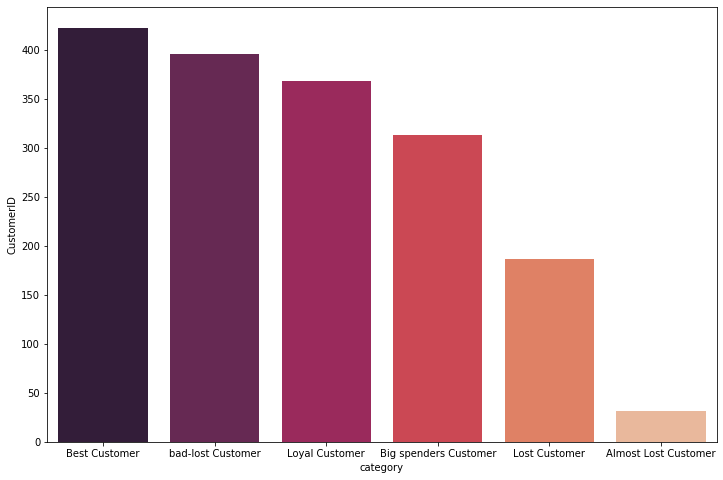

In [196]:
plt.figure(figsize=(12,8))
sns.barplot(data=Cust_df.drop([0]),x='category',y='CustomerID',palette='rocket')
plt.savefig("Customers_Category.png")

In [198]:
RFM_table = segmented_RFM[['Recency', 'Frequency', 'Monetary']]

In [199]:
#adding 1 to avoid 0 whose log value can lead to infinity
RFM_log_table = np.log(RFM_table+1)

In [80]:
#pip install feature_engine

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\skesh\AppData\Local\Continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


In [200]:
import feature_engine
from feature_engine.outliers import Winsorizer

In [201]:
windsoriser = Winsorizer(tail='both', # cap left, right or both tails 
                          fold=2,
                           variables=[ 'Recency', 'Frequency', 'Monetary']
                        )

windsoriser.fit(RFM_log_table)
RFM_log_table = windsoriser.transform(RFM_log_table)

In [203]:
#Developing preprocessing with StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(RFM_log_table)
RFM_Table_New_scaled = scaler.transform(RFM_log_table)

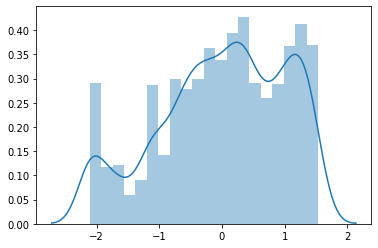

In [205]:
#Analyze Recency distribution

sns.distplot(RFM_Table_New_scaled[:,0])

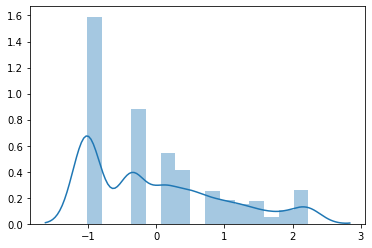

In [206]:
#Analyze Frequency distribution

sns.distplot(RFM_Table_New_scaled[:,1])

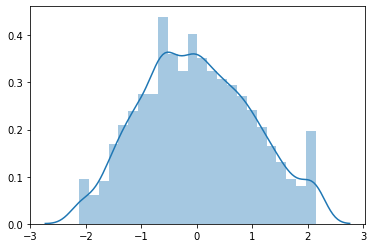

In [207]:
#Analyze Monetary distribution

sns.distplot(RFM_Table_New_scaled[:,2])

In [208]:
from sklearn.cluster import KMeans

range_of_clusters = 16

X = np.asarray(RFM_Table_New_scaled)
Sum_of_squared_distances = []
K = range(1,range_of_clusters)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)


## Elbow Plot

C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  


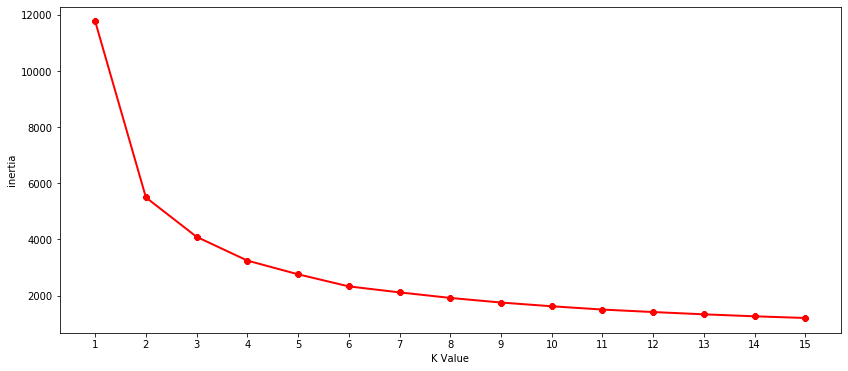

In [209]:
plt.figure(figsize=(14,6))    
plt.plot(range(1,range_of_clusters),Sum_of_squared_distances, linewidth=2, color="red", marker ="8",lw=4)
plt.xlabel("K Value")
plt.xticks(np.arange(1,range_of_clusters,1))
plt.ylabel("inertia")
plt.show()

In [116]:
def kmeans(RFM_Table_New_scaled, clusters_number, segmented_RFM):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(RFM_Table_New_scaled)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = segmented_RFM.assign(Cluster = cluster_labels)
        
    return df_new

In [210]:
#plt.figure(figsize=(10, 10))

#plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_New_scaled, 3, segmented_RFM)

#plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_New_scaled, 4, segmented_RFM)

#plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_New_scaled, 5, segmented_RFM)

#plt.tight_layout()

In [211]:
df_rfm_k4

,CustomerID,Recency,Frequency,Monetary,Recency_quartile,Frequency_quartile,Monetary_quartile,RFM_Score,category,Cluster
0,12346.0,324,1,77183.60,4,4,1,441,Big spenders Customer,1
1,12747.0,1,11,4196.01,1,1,1,111,Best Customer,0
2,12748.0,0,210,33719.73,1,1,1,111,Best Customer,0
3,12749.0,2,5,4090.88,1,2,1,121,Big spenders Customer,0
4,12820.0,2,4,942.34,1,2,2,122,Others,0
...,...,...,...,...,...,...,...,...,...,...
3916,18280.0,276,1,180.60,4,4,4,444,bad-lost Customer,2
3917,18281.0,179,1,80.82,4,4,4,444,bad-lost Customer,2
3918,18282.0,6,2,178.05,1,3,4,134,Almost Lost Customer,3
3919,18283.0,2,16,2094.88,1,1,1,111,Best Customer,0


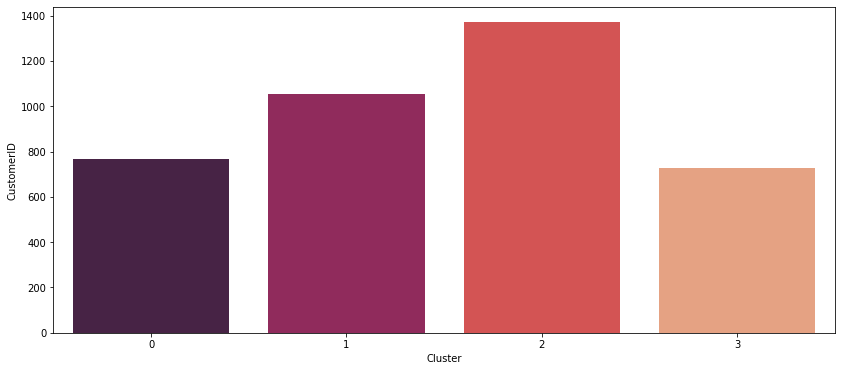

In [212]:
import seaborn as sns
sq1=df_rfm_k4.groupby('Cluster')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14,6))
sns.barplot(data=sq1, x="Cluster", y="CustomerID", palette = "rocket");

In [213]:
#Profiling our custers

def cluster_profiling(df):

    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)
    
    return df_new

In [214]:
cluster_profiling(df_rfm_k4)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          11.0      12.0   6360.0   766
1          75.0       4.0   1583.0  1056
2         185.0       1.0    311.0  1371
3          19.0       2.0    466.0   728

Cluster Interpretation

Cluster 0 : Represents the best customers who visit the store frequently and are big spenders

Cluster 1 : Represents customers who were good customers and used to visit the store frequently but have not visited recently
    
Cluster 2 : Represents lost customers who visited the store long back and only a selective times
    
Cluster 3 : Represents new customers who recently started visiting our store
    
Business Actiom 

1. Take feedback from customers from cluster 1 understand why they stopped visiting as they account for nearly 25% of the entire customer base

2. Study the purchase pattern from customers falling in cluster 0 and try to implement the same startegy to culster 3 for customer retention